In [1]:
import os
import numpy as np

In [2]:
f = open("slurm-10301619.txt", "r") 
params = f.read()
lines = params.split('\n')

In [3]:
I = 8
K = 22
MAXSKILLS = 4

In [4]:
theta = []
learn = []
lambda0 = []
lambda1 = []
g = []
ss = []

for line in lines[:I]:
    line = line.split(" ")
    line = list(filter(('').__ne__, line))
    theta.append(float(line[1]))

for line in lines[I:I+K]:
    line = line.split(" ")
    line = list(filter(('').__ne__, line))
    lambda0.append(float(line[1]))

for line in lines[I+K:I+2*K]:
    line = line.split(" ")
    line = list(filter(('').__ne__, line))
    lambda1.append(float(line[1]))

for line in lines[I+2*K:I+3*K]:
    line = line.split(" ")
    line = list(filter(('').__ne__, line))
    learn.append(float(line[1]))

for line in lines[I+3*K:I+4*K]:
    line = line.split(" ")
    line = list(filter(('').__ne__, line))
    g.append(float(line[1]))
    
for line in lines[I+4*K:I+5*K]:
    line = line.split(" ")
    line = list(filter(('').__ne__, line))
    ss.append(float(line[1]))

len(lambda1)

22

In [7]:
alpha = np.ones((I, K))
def sigmoid(x):
    return 1/(1+np.exp(-x))

for i in range(I):
    for k in range(K):
        alpha[i][k] = sigmoid(1.7 * lambda1[k] * (theta[i] - lambda0[k]))
os.chdir('../hotDINA')
T_filename = "T/T_130_all.npy"
Y_filename = "Y/Y_130_all.npy"
idxY_filename = "idxY/idxY_130_all.npy"

T = np.load(T_filename)
Y = np.load(Y_filename)
idxY = np.load(idxY_filename)

pred_y = []
alphas = [alpha.copy()]
user_num = 1

obs = 0

for i in range(I):
    for t in range(T[i]):
        copy_alpha = alphas[len(alphas)-1][:].copy()
        for s in range(MAXSKILLS):
            k = int(idxY[i][t][s]) - 1
            if k >= K:    continue
            copy_alpha[i][k] = (copy_alpha[i][k] * ss[k])/(copy_alpha[i][k]*ss[k] + (1-copy_alpha[i][k])*g[k])
        alphas.append(copy_alpha)

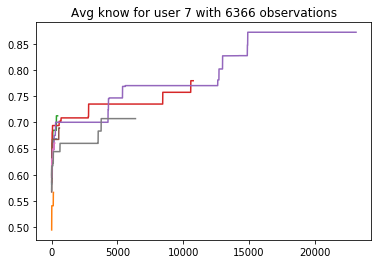

In [8]:
import matplotlib.pyplot as plt

knows = np.zeros(sum(T))

for i in range(I):
    start_opportunity = 0
    if i > 0:
        start_opportunity = sum(T[:i])
    for t in range(start_opportunity , start_opportunity+T[i]):
        alpha_t = alphas[t][i]
        knows[t] = (np.mean(alpha_t))

    plt.title("Avg know for user " + str(i) + " with " + str(T[i]) + " observations")
    plt.plot(np.arange(T[i]), knows[start_opportunity:start_opportunity+T[i]])
plt.show()